# Exploratory Data Analysis with Pandas/Seaborn and NumPy

## Overview

This analysis delves into a dataset offering insights into various aspects of residential properties. Key features include:

- **Number of Rooms ('num_rooms'):** The count of rooms in each dwelling.
- **Number of People ('num_people'):** Total occupants per residence.
- **House Area ('housearea'):** The size of each property.
- **Air Conditioning ('is_ac'):** A binary indicator (1 for Yes, 0 for No) denoting the presence of air conditioning.
- **Television ('is_tv'):** A binary indicator (1 for Yes, 0 for No) signaling the availability of a television.
- **House Type ('is_flat'):** A binary indicator (1 for Flat, 0 for Not Flat) specifying the dwelling type.
- **Number of Children ('num_children'):** Count of children in each household.
- **Urban Area ('is_urban'):** A binary indicator (1 for Yes, 0 for No) indicating whether the house is located in an urban area.
- **Amount Paid ('amount_paid'):** The financial value associated with each residence, denominated in Euros.

## Initial Overview

To kick off our exploration, we'll load the dataset and take a preliminary look at the initial rows. This initial exploration aims to set the stage for a more in-depth analysis, uncovering patterns, relationships, and notable characteristics within the data.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('3.csv')

# Display the first few rows of the DataFrame
df.head()

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,num_children,is_urban,amount_paid
0,3,3,742.57,1,1,1,2,0,61.87
1,1,5,952.99,0,1,0,1,1,69.90
2,3,1,761.44,1,1,1,0,0,56.50
3,0,5,861.32,1,1,0,0,0,36.76
4,1,8,731.61,0,1,0,2,1,72.66


## 1. Information about the DataFrame:

In [5]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_rooms     1000 non-null   int64  
 1   num_people    1000 non-null   int64  
 2   housearea     1000 non-null   float64
 3   is_ac         1000 non-null   int64  
 4   is_tv         1000 non-null   int64  
 5   is_flat       1000 non-null   int64  
 6   num_children  1000 non-null   int64  
 7   is_urban      1000 non-null   int64  
 8   amount_paid   1000 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 70.4 KB


## 1.1 Descriptive Statistics:

In [13]:
# Extract numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# 3. Min and Max Values
min_values = np.min(numeric_columns, axis=0)
max_values = np.max(numeric_columns, axis=0)

print("\nMinimum Values:")
print(min_values.to_string(header=False))

print("\nMaximum Values:")
print(max_values.to_string(header=False))


Minimum Values:
num_rooms         0.0
num_people        0.0
housearea       244.4
is_ac             0.0
is_tv             0.0
is_flat           0.0
num_children      0.0
is_urban          0.0
amount_paid       9.7

Maximum Values:
num_rooms          5.00
num_people        11.00
housearea       1189.12
is_ac              1.00
is_tv              1.00
is_flat            1.00
num_children       4.00
is_urban           1.00
amount_paid      121.75


## 2. Summary Statistics:

In [6]:
# Display summary statistics for numerical columns
summary_stats = df.describe()
summary_stats


,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,num_children,is_urban,amount_paid
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.967000,4.901000,794.703420,0.376000,0.798000,0.477000,1.078000,0.608000,66.271600
std,1.018306,1.996794,147.771736,0.484622,0.401693,0.499721,0.934232,0.488441,20.023567
min,0.000000,0.000000,244.400000,0.000000,0.000000,0.000000,0.000000,0.000000,9.700000
25%,1.000000,4.000000,691.037500,0.000000,1.000000,0.000000,0.000000,0.000000,52.437500
50%,2.000000,5.000000,789.970000,0.000000,1.000000,0.000000,1.000000,1.000000,66.040000
75%,3.000000,6.000000,892.955000,1.000000,1.000000,1.000000,2.000000,1.000000,80.567500
max,5.000000,11.000000,1189.120000,1.000000,1.000000,1.000000,4.000000,1.000000,121.750000


## 2.1 Missing Values:

In [20]:
# Display the count of missing values in each column
missing_values = df.isnull().sum()
missing_values


num_rooms       0
num_people      0
housearea       0
is_ac           0
is_tv           0
is_flat         0
num_children    0
is_urban        0
amount_paid     0
dtype: int64

## 3. Correlation Matrix:

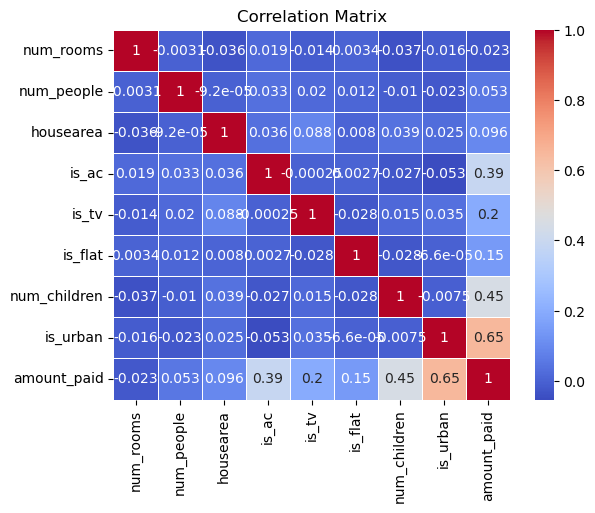

In [3]:
# Display the correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


## 4. Distribution of 'num_people': 

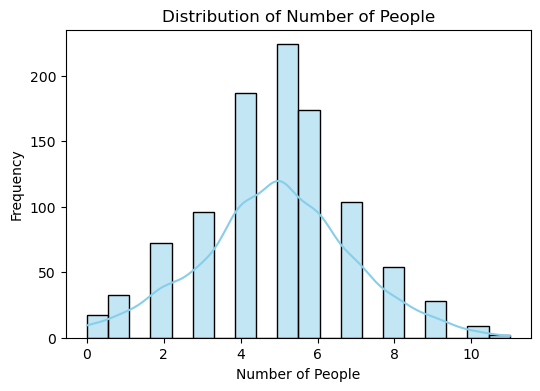

In [9]:
# Histogram for 'num_people'
plt.figure(figsize=(6, 4))
sns.histplot(df['num_people'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Number of People')
plt.xlabel('Number of People')
plt.ylabel('Frequency')
plt.show()


## 5. Boxplot for 'amount_paid':

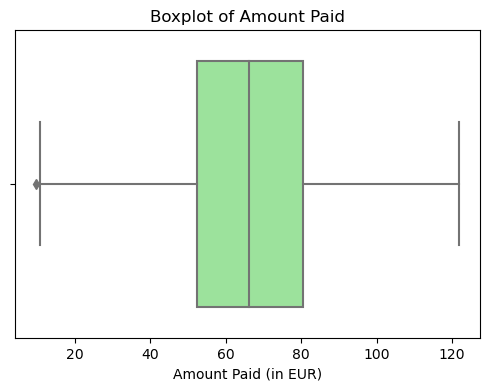

In [8]:
# Boxplot for 'amount_paid'
plt.figure(figsize=(6, 4))
sns.boxplot(x='amount_paid', data=df, color='lightgreen')
plt.title('Boxplot of Amount Paid')
plt.xlabel('Amount Paid (in EUR)')
plt.show()

## 6. Bar Plot for 'is_flat' and 'is_urban':

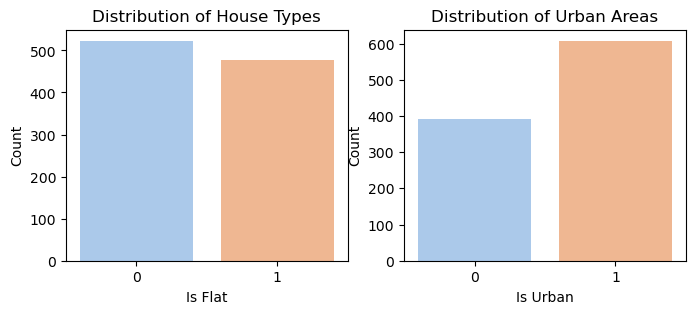

In [27]:
# Bar plot for 'is_flat' and 'is_urban'
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

sns.countplot(x='is_flat', data=df, palette='pastel', ax=axes[0])
axes[0].set_title('Distribution of House Types')
axes[0].set_xlabel('Is Flat')
axes[0].set_ylabel('Count')

sns.countplot(x='is_urban', data=df, palette='pastel', ax=axes[1])
axes[1].set_title('Distribution of Urban Areas')
axes[1].set_xlabel('Is Urban')
axes[1].set_ylabel('Count')

plt.show()


## 7. Scatter Plot between 'housearea' and 'amount_paid':

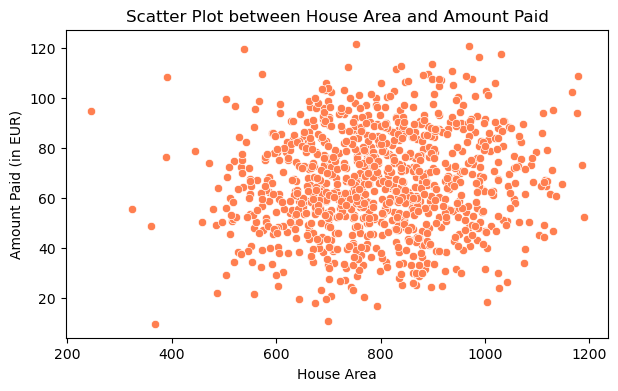

In [25]:
# Scatter plot between 'housearea' and 'amount_paid'
plt.figure(figsize=(7, 4))
sns.scatterplot(x='housearea', y='amount_paid', data=df, color='coral')
plt.title('Scatter Plot between House Area and Amount Paid')
plt.xlabel('House Area')
plt.ylabel('Amount Paid (in EUR)')
plt.show()


## 8. Average 'amount_paid' for Different House Types:

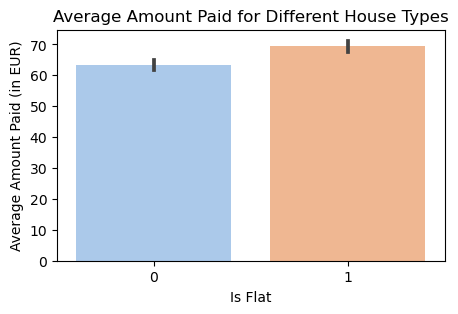

In [14]:
# Bar plot for average 'amount_paid' by 'is_flat'
plt.figure(figsize=(5, 3))
sns.barplot(x='is_flat', y='amount_paid', data=df, palette='pastel')
plt.title('Average Amount Paid for Different House Types')
plt.xlabel('Is Flat')
plt.ylabel('Average Amount Paid (in EUR)')
plt.show()


## 9. Line Plot for 'amount_paid' over 'num_people':

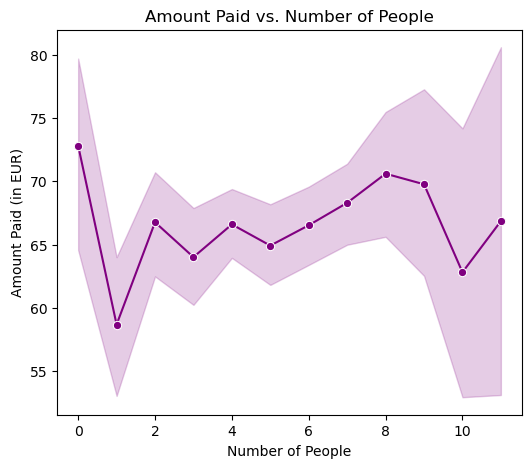

In [22]:
# Line plot for 'amount_paid' over 'num_people'
plt.figure(figsize=(6, 5))
sns.lineplot(x='num_people', y='amount_paid', data=df, marker='o', color='purple')
plt.title('Amount Paid vs. Number of People')
plt.xlabel('Number of People')
plt.ylabel('Amount Paid (in EUR)')
plt.show()


## 10. Custom Function for Analysis:

In [29]:
#Custom function to find the average amount paid per room
def avg_amount_per_room(row):
    if row['num_rooms'] != 0:
        return row['amount_paid'] / row['num_rooms']
    else:
        return 0  # or any other value you prefer for division by zero

# Apply the custom function
df['avg_amount_per_room'] = df.apply(avg_amount_per_room, axis=1)
df[['num_rooms', 'amount_paid', 'avg_amount_per_room']]


,num_rooms,amount_paid,avg_amount_per_room
0,3,61.87,20.623333
1,1,69.90,69.900000
2,3,56.50,18.833333
3,0,36.76,0.000000
4,1,72.66,72.660000
...,...,...,...
995,3,72.39,24.130000
996,2,39.13,19.565000
997,2,62.77,31.385000
998,1,72.12,72.120000
